## Pattern Recognition Assignment -2

<br> by Siddhant Verma - 2K18/EC/167

#### Question 1 

This repository contains the dataset

In [122]:
cd ./datasets/

[Errno 2] No such file or directory: './datasets/'
/mnt/c/Users/siddh/ML_lab/PR-assignment-2/datasets


In [123]:
ls

 Index*        bezdekIris.data*   iris.names*     sat.trn*
'Index (1)'*   iris.data*        'sat (1).doc'*   sat.tst*


In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

1) Loading the dataset and converting it into numpy arrays

In [125]:
train = np.genfromtxt('./sat.trn')
train.shape

(4435, 37)

In [126]:
test = np.genfromtxt('./sat.tst')
test.shape

(2000, 37)

In [127]:
x_train = train[:,:36]
y_train = train[:,36]

xtest = test[:,:36]
ytest = test[:,36]


### Splitting training data into training and validation 70:30

In [128]:
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [129]:
tsne = TSNE(n_components=2, random_state=0)
tsnematrix = tsne.fit_transform(xtrain)

TSNE Visualisation of training set

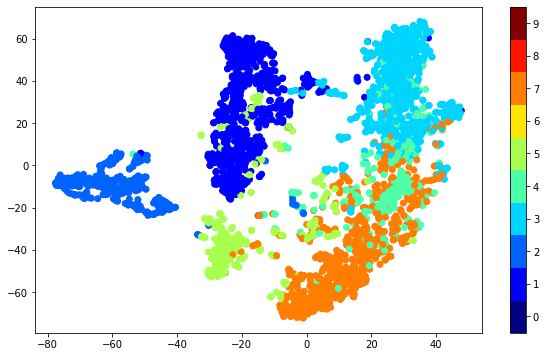

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(tsnematrix[:,0], tsnematrix[:,1], c=ytrain, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

2) KNN from scratch

#### Calculate distance to all neighbours

Using Euclidean distance. 
#### Definiton
$d(p, q) = d(q, p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \dots + (q_D - p_D)^2} = \sum_{d=1}^{D} (p_d - q_d)^2$

#### Example

$p = (4,6)$
<br>
$q = (1,2)$
<br>
$d(p, q) = \sqrt{(1-4)^2 + (2-6)^2} =\sqrt{9 + 16} = \sqrt{25} = 5 $

The formula used below in the knn_distances function has only been expanded to suit the mulitple dimensions of the matrices so it works well with 2-D matrices. 

I have only expanded the $(a-b)^2$ as $a^2 + b^2 - 2.a.b$


Here in the code: 
@ is the matrix multiplication operator
and 
.T is used to return the trasnpose of the matrix.

In [131]:
def knn_distances(xTrain,xTest,k):
    #the following formula calculates the Euclidean distances btw training and test samples.
    
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    
    #because of float precision, some small numbers can become negatives. Need to be replace with 0
    
    distances[distances < 0] = 0
    distances = distances**.5
    
    # find the snearest neighbours thus sort them and take initial values
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted
    
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]


def knn_predictions(xTrain,yTrain,xTest,k=3):
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten() #flattening into a single dimensional array
    rows, columns = indices.shape
    predictions = list()     #blank list
    
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])    #appending to a list which stores the labels of all the nearest neighbours
        predictions.append(max(temp,key=temp.count)) #prediction = class which is present in highest number
    predictions=np.array(predictions)
    return predictions

def knn_accuracy(yTest,predictions):
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)

### Valiadtion Predictions with k = 3 to check if working 

In [132]:
predictions = knn_predictions(xtrain, ytrain, xval,3) #taking sample value of k = 3
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (1331,)


### Validation Accuracy 

In [133]:
print('Validation Accuracy:',knn_accuracy(predictions,yval),'%')

Validation Accuracy: 90.23 %


### Testing Accuracy on k = 3

In [134]:
predictions = knn_predictions(xtrain, ytrain, xtest,3) #taking sample value of k = 3

print('Testing Accuracy:',knn_accuracy(predictions,ytest),'%')

Testing Accuracy: 89.9 %


### Grid Search on validation set

In [135]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [136]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    yhat = knn_predictions(xtrain,ytrain,xval,n)
    mean_acc[n-1] = metrics.accuracy_score(yval, yhat)
    std_acc[n-1] = np.std(yhat==yval)/np.sqrt(yhat.shape[0])


### Accuracy on validation set for k = 1-20

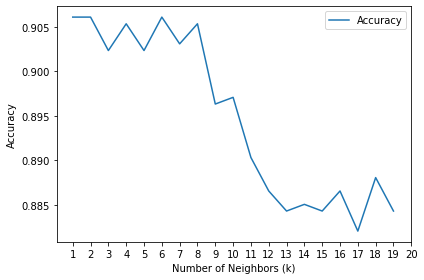

In [137]:
xint = range(1,Ks+1)

plt.plot(range(1,Ks),mean_acc)
plt.legend(['Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.xticks(xint)
plt.tight_layout()
plt.show()

### Error vs Number of neighbours graph on validation set

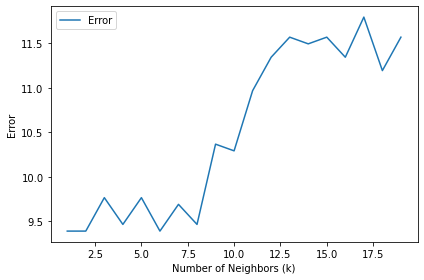

In [138]:
plt.plot(range(1,Ks),100*(1-mean_acc))
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(['Error'])
plt.ylabel('Error')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

### Optimal value of k and accuracy for validation

In [139]:
print( "The best validation accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1)

The best validation accuracy was: 90.61 % with k= 1


### Grid search on Testing Set

In [140]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    yhat = knn_predictions(xtrain,ytrain,xtest,n)
    mean_acc[n-1] = metrics.accuracy_score(ytest, yhat)
    std_acc[n-1] = np.std(yhat==ytest)/np.sqrt(yhat.shape[0])


### Accuracy on Testing set for k = 1-20

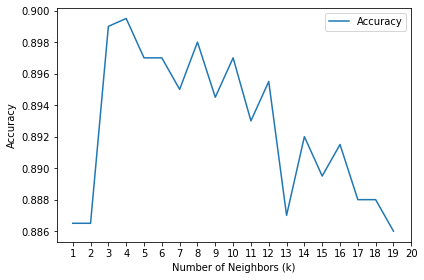

In [141]:
xint = range(1,Ks+1)

plt.plot(range(1,Ks),mean_acc)
plt.legend(['Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.xticks(xint)
plt.tight_layout()
plt.show()

### Error vs Number of neighbours graph on validation set

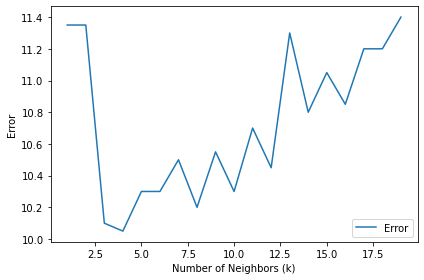

In [142]:
plt.plot(range(1,Ks),100*(1-mean_acc))
plt.legend(['Error'])
plt.ylabel('Error')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

### Optimal value of k and accuracy for testing

In [143]:
print( "The best testing accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1)

The best testing accuracy was: 89.95 % with k= 4


# using sklearn knn

### Validation

In [144]:
krange = range(1,15)

scores = {}
scorelist = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(xtrain, ytrain)
    
    ypred = knn.predict(xval)
    scores[k] = metrics.accuracy_score(yval, ypred)
    scorelist.append(metrics.accuracy_score(yval, ypred))

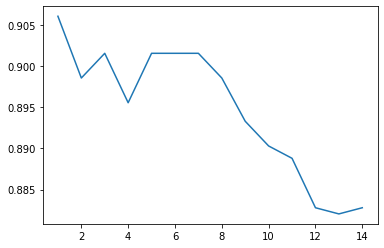

In [145]:
plt.plot(krange, scorelist)

In [146]:
scorelist = np.array(scorelist)
print( "The best validation accuracy was:", np.round(scorelist.max()*100,2), "% with k=", scorelist.argmax()+1)

The best validation accuracy was: 90.61 % with k= 1


### testing

In [147]:
krange = range(1,15)

scores = {}
scorelist = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(xtrain, ytrain)
    
    ypred = knn.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest, ypred)
    scorelist.append(metrics.accuracy_score(ytest, ypred))

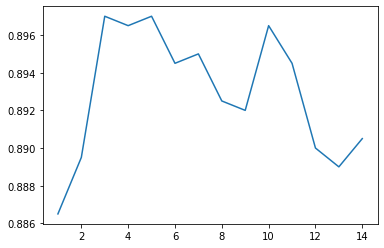

In [148]:
plt.plot(krange, scorelist)

In [149]:
scorelist = np.array(scorelist)
print( "The best testing accuracy was:", np.round(scorelist.max()*100,2), "% with k=", scorelist.argmax()+1)

The best testing accuracy was: 89.7 % with k= 3


_________________________________________________________________________________________